<p style="color:red">Exercice 1 :</p>

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
distance = ctrl.Antecedent(np.arange(0, 31, 1), 'Distance_to_next_car')

In [3]:
distance['v_small'] = fuzz.trapmf(distance.universe, [0, 0, 4, 8])
distance['small']   = fuzz.trimf(distance.universe, [6, 10, 14])
distance['perfect'] = fuzz.trimf(distance.universe, [12, 15, 18])
distance['big']     = fuzz.trimf(distance.universe, [16, 20, 24])
distance['v_big']   = fuzz.trapmf(distance.universe, [22, 26, 30, 30])

C:\Users\info\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


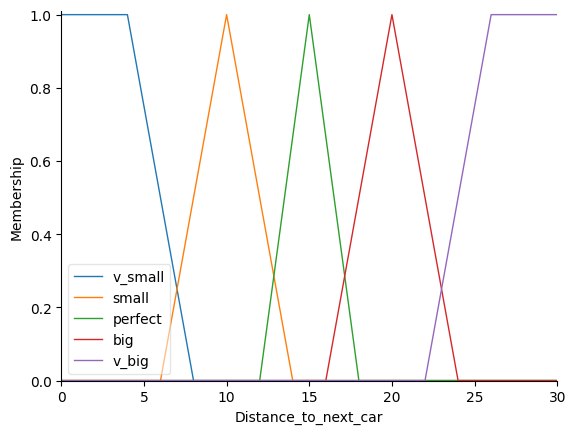

In [4]:
distance.view()

<p style="color:red">Exercice 2 :</p>

In [5]:
speed_change = ctrl.Antecedent(np.arange(-20, 21, 1), 'Speed_change')

In [6]:
speed_change['declining'] = fuzz.trapmf(speed_change.universe, [-20, -20, -10, -2])
speed_change['constant'] = fuzz.trimf(speed_change.universe, [-3, 0, 3])
speed_change['growing'] = fuzz.trapmf(speed_change.universe, [2, 8, 20, 20])

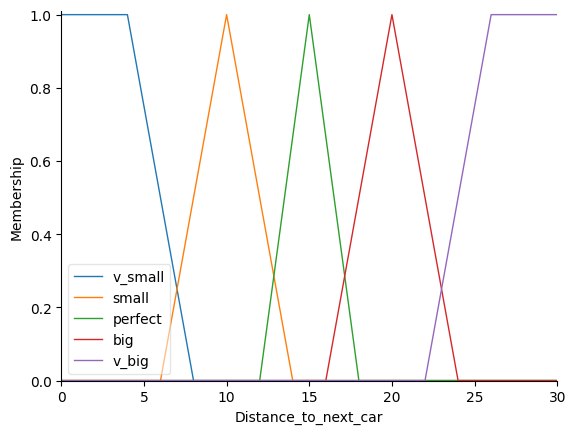

In [7]:
distance.view()

<p style="color:red">Exercice 3 :</p>

In [8]:
acceleration = ctrl.Consequent(np.arange(-3, 3.1, 0.1), 'Acceleration_Adjust')

In [9]:
acceleration['neg_big'] = fuzz.trapmf(acceleration.universe, [-3, -3, -2.5, -1.5])
acceleration['neg_small'] = fuzz.trimf(acceleration.universe, [-2, -1, 0])
acceleration['zero'] = fuzz.trimf(acceleration.universe, [-0.5, 0, 0.5])
acceleration['pos_small'] = fuzz.trimf(acceleration.universe, [0, 1, 2])
acceleration['pos_big'] = fuzz.trapmf(acceleration.universe, [1.5, 2.5, 3, 3])

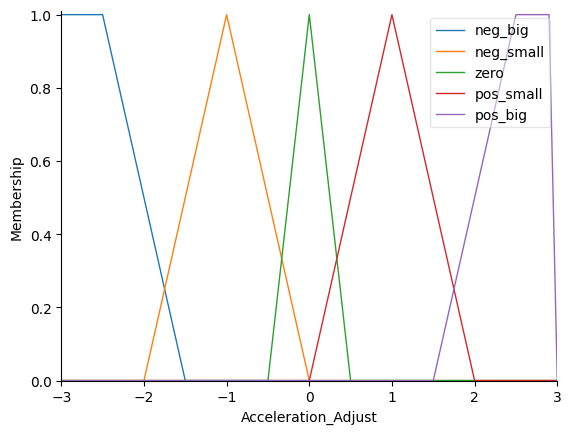

In [10]:
acceleration.view()

<p style="color:red">Exercice 4 :</p>

In [11]:
rule1 = ctrl.Rule(distance['v_small'] & speed_change['declining'], acceleration['neg_small'])
rule2 = ctrl.Rule(distance['v_small'] & speed_change['constant'], acceleration['neg_big'])
rule3 = ctrl.Rule(distance['v_small'] & speed_change['growing'], acceleration['neg_big'])
rule4 = ctrl.Rule(distance['small'] & speed_change['declining'], acceleration['zero'])
rule5 = ctrl.Rule(distance['small'] & speed_change['constant'], acceleration['neg_small'])
rule6 = ctrl.Rule(distance['small'] & speed_change['growing'], acceleration['neg_big'])
rule7 = ctrl.Rule(distance['perfect'] & speed_change['declining'], acceleration['pos_small'])
rule8 = ctrl.Rule(distance['perfect'] & speed_change['constant'], acceleration['zero'])
rule9 = ctrl.Rule(distance['perfect'] & speed_change['growing'], acceleration['neg_small'])
rule10 = ctrl.Rule(distance['big'] & speed_change['declining'], acceleration['pos_big'])
rule11 = ctrl.Rule(distance['big'] & speed_change['constant'], acceleration['pos_small'])
rule12 = ctrl.Rule(distance['big'] & speed_change['growing'], acceleration['zero'])
rule13 = ctrl.Rule(distance['v_big'] & speed_change['declining'], acceleration['pos_big'])
rule14 = ctrl.Rule(distance['v_big'] & speed_change['constant'], acceleration['pos_big'])
rule15 = ctrl.Rule(distance['v_big'] & speed_change['growing'], acceleration['pos_small'])

In [12]:
accel_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,
    rule9, rule10, rule11, rule12, rule13, rule14, rule15
])

In [13]:
accel_sim = ctrl.ControlSystemSimulation(accel_ctrl)

In [14]:
accel_sim.input['Distance_to_next_car'] = 13
accel_sim.input['Speed_change'] = -2.5

In [15]:
accel_sim.compute()

In [16]:
print(f"Valeur de sortie (Acceleration_Adjust) = {accel_sim.output['Acceleration_Adjust']:.3f}")

Valeur de sortie (Acceleration_Adjust) = -0.355


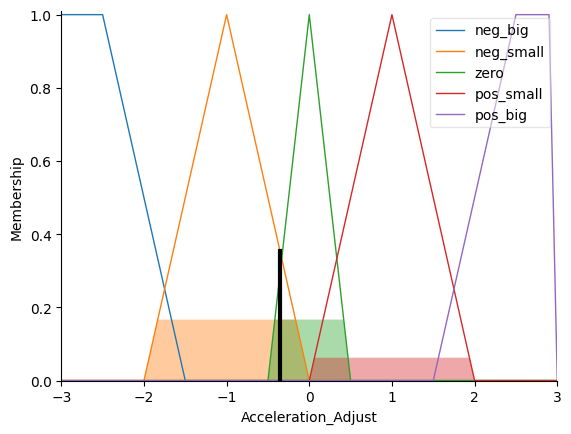

In [17]:
acceleration.view(sim=accel_sim)
plt.show()